In [97]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pymc3 as pm
import scipy.io
import scipy as sp

In [98]:
# function to calculate A and B from the dataset
def OUanalytic(data):
    N = data.size
    data1sq = data[0]**2
    dataNsq = data[-1]**2
    datasq = np.sum(data[1:-1]**2)
    datacorr = np.sum(data[0:-1]*data[1:])
    coef = [(N-1)*datasq,
       (2.0-N)*datacorr,
       -data1sq-(N+1)*datasq-dataNsq,
       N*datacorr]
    B=np.roots(coef)[-1]
    Q=(data1sq+dataNsq)/(1-B**2)
    Q=Q+datasq*(1+B**2)/(1-B**2)
    Q=Q-datacorr*2*B/(1-B**2)
    A = Q/N
    P2A = -N/A**2/2
    Btmp = B**2*(1+2*N)
    tmp = (1+Btmp)*(data1sq+dataNsq) + (2*Btmp + N + 1 -B**4*(N-1))*datasq - 2*B*(1+B**2+2*N)*datacorr
    P2B = -tmp/((1-B**2)**2*(data1sq+dataNsq + (1+B**2)*datasq - 2*B*datacorr))
    PAB = (N-1)*B/A/(1-B**2)
    dA = np.sqrt(-P2B/(P2A*P2B-PAB**2))
    dB = np.sqrt(-P2A/(P2A*P2B-PAB**2))
    return A,dA,B,dB

def OUresult(data,deltat):
    A, dA, B ,dB = OUanalytic(data)
    tau = -deltat/np.log(B)
    dtau = deltat*dB/B/np.log(B)**2
    return A,dA,tau,dtau

In [99]:
oxy_sub1=scipy.io.loadmat('oxytocinRSdata/subject5.mat')
oxy_sub1

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Mon Dec 17 12:42:20 2018',
 '__version__': '1.0',
 '__globals__': [],
 'mts': array([[[ 3.57265019, -2.24866176, -2.75328279, ...,  3.21417546,
           3.41974545,  4.04043436]],
 
        [[ 6.13130188, -4.17498922, -3.42398882, ...,  2.51091051,
          -2.15392351, -2.44710684]],
 
        [[ 3.68823433, -1.82263339, -3.14926624, ...,  0.26335081,
           1.94014597,  1.92463207]],
 
        [[ 4.81437445, -4.28336239, -3.10322881, ..., -1.22942626,
          -1.05734944,  0.22980012]]]),
 'roi_name': array([['LLP.nii '],
        ['mPFC.nii'],
        ['PCC.nii '],
        ['RLP.nii ']], dtype='<U8'),
 'roi_size': array([[1041],
        [1346],
        [4833],
        [1326]])}

In [100]:
llp = oxy_sub1['mts'][0][0]
mpfc = oxy_sub1['mts'][1][0]
pcc = oxy_sub1['mts'][2][0]
rlp = oxy_sub1['mts'][3][0]

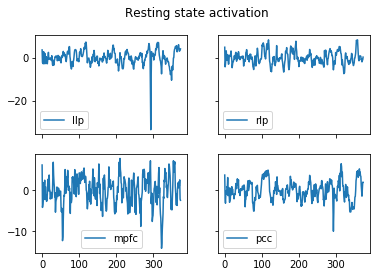

In [101]:
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', sharey='row')
f.suptitle('Resting state activation')
ax1.plot(llp, label="llp")
ax1.legend()
ax2.plot(rlp,label = "rlp")
ax2.legend()
ax3.plot(mpfc,label = "mpfc")
ax3.legend()
ax4.plot(pcc,label = "pcc")
ax4.legend()

mean:  -3.648095111795925e-09
var:  11.840754191452165
N:  374
relaxation time: 2.5011667211688273 SD tau 0.3835994982398942
A  11.899592964336897 SD A 1.5630867531520287


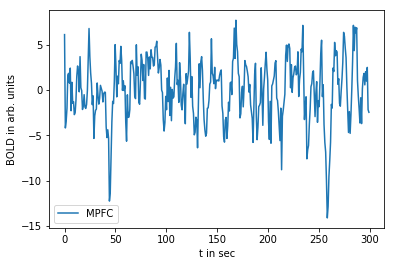

In [102]:
print("mean: ",mpfc.mean())
print("var: ",mpfc.std()**2)
N=len(mpfc)
print("N: ",N)
mpfc_A,mpfc_sA, mpfc_tau, mpfc_dtau = OUresult(mpfc,0.802)
print("relaxation time:",mpfc_tau, "SD tau", mpfc_dtau)
print("A ",mpfc_A,"SD A",mpfc_sA)
mpfc_norm=mpfc/np.sqrt(mpfc_A)
t = np.arange(N)*0.802 # tR = 0.802 sec
plt.plot(t,mpfc,label="MPFC")
plt.xlabel("t in sec")
plt.ylabel("BOLD in arb. units")
plt.legend()

mean:  4.606809526841271e-11
var:  5.325412338794888
N:  374
relaxation time: 3.9126678135768467 SD tau 0.7033100484820269
A  5.3601679206364485 SD A 0.870610370111339
0.9967527039299913


Text(0,0.5,'BOLD in arb. units')

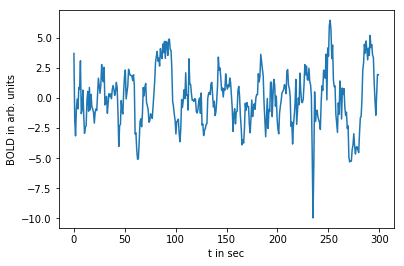

In [103]:
print("mean: ",pcc.mean())
print("var: ",pcc.std()**2)
N=len(pcc)
print("N: ",N)
pcc_A,pcc_sA, pcc_tau, pcc_dtau = OUresult(pcc,0.802)
print("relaxation time:",pcc_tau, "SD tau", pcc_dtau)
print("A ",pcc_A,"SD A",pcc_sA)
pcc_norm=pcc/np.sqrt(pcc_A)
print(pcc_norm.std())
plt.plot(t,pcc)
plt.xlabel("t in sec")
plt.ylabel("BOLD in arb. units")

mean:  8.660801910461588e-09
var:  8.294143209780941
N:  374
relaxation time: 3.80280155163353 SD tau 0.674926353297886
A  8.327652396556894 SD A 1.3322921914547112
0.9979860492418955


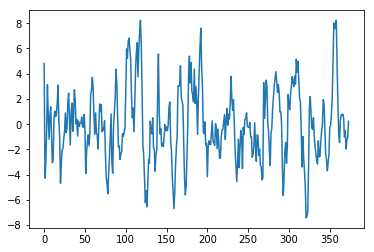

In [104]:
plt.plot(rlp)
print("mean: ",rlp.mean())
print("var: ",rlp.std()**2)
N=len(rlp)
print("N: ",N)
rlp_A,rlp_sA, rlp_tau, rlp_dtau = OUresult(rlp,0.802)
print("relaxation time:",rlp_tau, "SD tau", rlp_dtau)
print("A ",rlp_A,"SD A",rlp_sA)
rlp_norm=rlp/np.sqrt(rlp_A)
print(rlp_norm.std())

mean:  2.100456127508439e-09
var:  11.910621040630737
N:  374
relaxation time: 2.6379558230034137 SD tau 0.41020611185854783
A  11.927345053003712 SD A 1.6022433056400869
0.9992986754874738


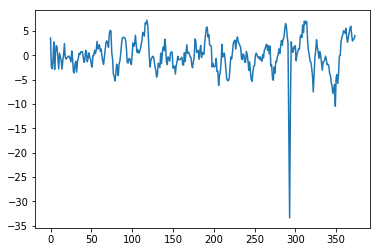

In [105]:
plt.plot(llp)
print("mean: ",llp.mean())
print("var: ",llp.std()**2)
N=len(llp)
print("N: ",N)
llp_A,llp_sA, llp_tau, llp_dtau = OUresult(llp,0.802)
print("relaxation time:",llp_tau, "SD tau", llp_dtau)
print("A ",llp_A,"SD A",llp_sA)
llp_norm=llp/np.sqrt(llp_A)
print(llp_norm.std())

{'whiskers': [<matplotlib.lines.Line2D at 0x1c215c97b8>,
 'caps': [<matplotlib.lines.Line2D at 0x1c215d40b8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c215c9668>],
 'medians': [<matplotlib.lines.Line2D at 0x1c215d4908>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c215d4d30>],
 'means': []}

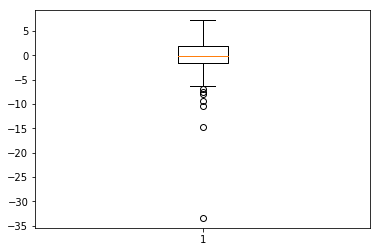

In [111]:
plt.boxplot(llp)

In [106]:
def OUcross(data1,data2):
    x1 = data1 + data2
    x2 = data1 - data2
    x1_A,x1_dA, x1_tau ,x1_dtau= OUresult(x1,0.802)
    x2_A, x2_dA, x2_tau ,x2_dtau= OUresult(x2,0.802)
    return (x1_A - x2_A)/x2_A, np.sqrt(x1_dA**2 + x1_A**2*x2_dA**2/x2_A**4)
print("MPFC:PCC",OUcross(mpfc_norm,pcc_norm))
print("MPFC:RLP",OUcross(mpfc_norm,rlp_norm))
print("MPFC:LLP",OUcross(mpfc_norm,llp_norm))
print("PCC:RLP",OUcross(pcc_norm,rlp_norm))
print("PCC:LLP",OUcross(pcc_norm,llp_norm))
print("RLP:LLP",OUcross(rlp_norm,llp_norm))
print("Pearson MPFC:PCC",sp.stats.pearsonr(mpfc_norm,pcc_norm))
print("Pearson MPFC:RLP",sp.stats.pearsonr(mpfc_norm,rlp_norm))
print("Pearson MPFC:LLP",sp.stats.pearsonr(mpfc_norm,llp_norm))
print("Pearson PCC:RLP",sp.stats.pearsonr(pcc_norm,rlp_norm))
print("Pearson PCC:LLP",sp.stats.pearsonr(pcc_norm,llp_norm))
print("Pearson RLP:LLP",sp.stats.pearsonr(rlp_norm,llp_norm))

MPFC:PCC (0.8652043098166519, 0.46337520754352113)
MPFC:RLP (1.543671587375013, 0.5448032851851881)
MPFC:LLP (0.11000175435988188, 0.3157404175424025)
PCC:RLP (2.757346233832534, 0.73704882881843)
PCC:LLP (4.01251192500095, 0.7881390795254862)
RLP:LLP (2.087704833669585, 0.6066000270517365)
Pearson MPFC:PCC (0.29742858352221563, 4.4638277957993585e-09)
Pearson MPFC:RLP (0.42990614844519875, 2.9596956508087113e-18)
Pearson MPFC:LLP (0.04953516390554359, 0.3394035710736698)
Pearson PCC:RLP (0.5749188950582331, 2.755674742078358e-34)
Pearson PCC:LLP (0.6648750079869876, 4.546058388945259e-49)
Pearson RLP:LLP (0.5087574602990136, 5.138850075769595e-26)


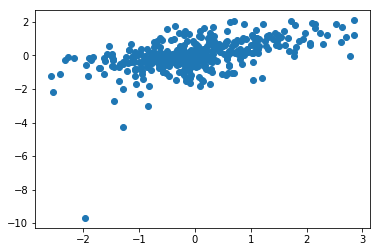

In [107]:
plt.scatter(rlp_norm,llp_norm)

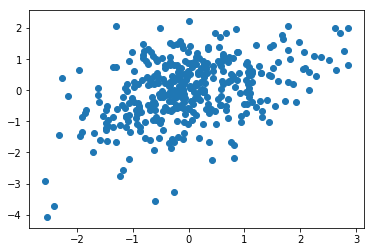

In [108]:
plt.scatter(rlp_norm,mpfc_norm)

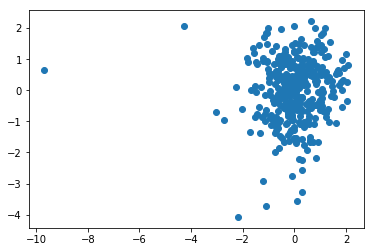

In [109]:
plt.scatter(llp_norm,mpfc_norm)

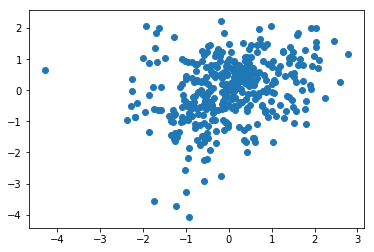

In [110]:
plt.scatter(pcc_norm,mpfc_norm)